In [1]:
import pandas as pd
import plotly.express as px
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK
from yellowbrick.cluster import KElbowVisualizer

In [4]:
# pip install gap-stat

In [5]:
# pip install yellowbrick

In [6]:
news_data = pd.read_csv('news.csv')

In [7]:
news_data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [8]:
true_news = pd.read_csv('true.csv')

In [9]:
true_news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [10]:
fake_news = pd.read_csv('fake.csv')

In [11]:
fake_news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [12]:
API_news = pd.read_csv('API_news.csv')

In [13]:
API_news.head()

title  \
0  Biden will win South Carolina Democratic prima...   
1  Wyndham Clark fires course-record 60 | Round 3...   
2  At least 46 were killed in Chile as forest fir...   
3  Rare 'high risk' of flash flooding issued in S...   
4  5 shocking moments in Grammy history: Jennifer...   

                                             content          subject  \
0  South Carolina, the state that launched Joe Bi...              CNN   
1                                                NaN          YouTube   
2  A resident flees an encroaching forest fire in...              NPR   
3  LOS ANGELES – A rare extreme flash flood risk ...   Foxweather.com   
4  The Grammy Awards ceremony is one of the most ...  Hindustan Times   

                   date  
0  2024-02-04T01:24:00Z  
1  2024-02-04T01:00:35Z  
2  2024-02-04T00:51:33Z  
3  2024-02-04T00:45:00Z  
4  2024-02-04T00:44:24Z

In [14]:
news_articles = pd.read_csv('news_articles.csv')

In [15]:
news_articles.head()

author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  \
0  print they should pay all the back all the mon...  english   
1  why did attorney general loretta lynch plead t...  english   
2  red state  \nfox news sunday reported this mor...  english   
3  email kayla mueller was a prisoner and torture...  english   
4  email healthcare reform to make america great ...  english   

              site_url                                       main_img_url  \
0  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
1  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
2  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
3  100percentfedup.com  http://100percentfedup.com/wp-content/uploads/...   
4  100percentfedup.com  http://100percentfedup.com/wp-content/uploads/...   

   type label                            title_without_stopwords  \
0  bias  Real        muslims busted stole millions govt benefits   
1  bias  Real         attorney general loretta lynch plead fifth   
2  bias  Real  breaking weiner cooperating fbi hillary email ...   
3  bias  Real  pin drop speech father daughter kidnapped kill...   
4  bias  Real  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage  
0  print pay back money plus interest entire fami...       1.0  
1  attorney general loretta lynch plead fifth bar...       1.0  
2  red state fox news sunday reported morning ant...       1.0  
3  email kayla mueller prisoner tortured isis cha...       1.0  
4  email healthcare reform make america great sin...       1.0

In [16]:
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [17]:
news_articles.shape

(2096, 12)

In [18]:
missing_text_rows = news_articles[news_articles['text'].isnull()]

# Display information about the missing values
print("Rows with missing values in the 'text' column:")
print(missing_text_rows)

Rows with missing values in the 'text' column:
             author                      published  \
2050    -NO AUTHOR-  2016-10-27T03:19:40.578+03:00   
2051    -NO AUTHOR-  2016-10-27T03:32:23.580+03:00   
2052    Leo Hohmann  2016-10-27T03:32:35.039+03:00   
2053    -NO AUTHOR-  2016-10-27T03:32:37.291+03:00   
2054    -NO AUTHOR-  2016-10-27T04:01:58.682+03:00   
2055  Greg Corombos  2016-10-27T04:07:06.853+03:00   
2056    Jay Baggett  2016-10-27T04:07:10.942+03:00   
2057  Greg Corombos  2016-10-27T04:07:43.509+03:00   
2058    Jay Baggett  2016-10-27T04:07:44.743+03:00   
2059    -NO AUTHOR-  2016-10-27T04:19:46.902+03:00   
2060    -NO AUTHOR-  2016-10-27T04:22:40.638+03:00   
2061    -NO AUTHOR-  2016-10-27T04:30:02.029+03:00   
2062      Bob Unruh  2016-10-27T04:38:26.243+03:00   
2063    -NO AUTHOR-  2016-10-27T04:38:32.298+03:00   
2064      Bob Unruh  2016-10-27T04:38:33.848+03:00   
2065    -NO AUTHOR-  2016-10-27T04:38:38.554+03:00   
2066  Vanessa Frank  2016-10-27T04:

In [19]:
news_articles_cleaned = news_articles.dropna(subset=['text'])

In [20]:
news_articles_cleaned.shape

(2050, 12)

In [21]:
news_articles_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2050 non-null   object 
 1   published                2050 non-null   object 
 2   title                    2050 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2050 non-null   object 
 5   site_url                 2050 non-null   object 
 6   main_img_url             2050 non-null   object 
 7   type                     2050 non-null   object 
 8   label                    2050 non-null   object 
 9   title_without_stopwords  2049 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2050 non-null   float64
dtypes: float64(1), object(11)
memory usage: 208.2+ KB


In [22]:
news_articles_cleaned.head()

author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  \
0  print they should pay all the back all the mon...  english   
1  why did attorney general loretta lynch plead t...  english   
2  red state  \nfox news sunday reported this mor...  english   
3  email kayla mueller was a prisoner and torture...  english   
4  email healthcare reform to make america great ...  english   

              site_url                                       main_img_url  \
0  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
1  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
2  100percentfedup.com  http://bb4sp.com/wp-content/uploads/2016/10/Fu...   
3  100percentfedup.com  http://100percentfedup.com/wp-content/uploads/...   
4  100percentfedup.com  http://100percentfedup.com/wp-content/uploads/...   

   type label                            title_without_stopwords  \
0  bias  Real        muslims busted stole millions govt benefits   
1  bias  Real         attorney general loretta lynch plead fifth   
2  bias  Real  breaking weiner cooperating fbi hillary email ...   
3  bias  Real  pin drop speech father daughter kidnapped kill...   
4  bias  Real  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage  
0  print pay back money plus interest entire fami...       1.0  
1  attorney general loretta lynch plead fifth bar...       1.0  
2  red state fox news sunday reported morning ant...       1.0  
3  email kayla mueller prisoner tortured isis cha...       1.0  
4  email healthcare reform make america great sin...       1.0

In [23]:
columns_to_drop = ['site_url', 'main_img_url']

df_dropped = news_articles_cleaned.drop(columns=columns_to_drop)

In [24]:
df_dropped.head()

author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  muslims busted they stole millions in govt ben...   
1  re why did attorney general loretta lynch plea...   
2  breaking weiner cooperating with fbi on hillar...   
3  pin drop speech by father of daughter kidnappe...   
4  fantastic trumps  point plan to reform healthc...   

                                                text language  type label  \
0  print they should pay all the back all the mon...  english  bias  Real   
1  why did attorney general loretta lynch plead t...  english  bias  Real   
2  red state  \nfox news sunday reported this mor...  english  bias  Real   
3  email kayla mueller was a prisoner and torture...  english  bias  Real   
4  email healthcare reform to make america great ...  english  bias  Real   

                             title_without_stopwords  \
0        muslims busted stole millions govt benefits   
1         attorney general loretta lynch plead fifth   
2  breaking weiner cooperating fbi hillary email ...   
3  pin drop speech father daughter kidnapped kill...   
4  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage  
0  print pay back money plus interest entire fami...       1.0  
1  attorney general loretta lynch plead fifth bar...       1.0  
2  red state fox news sunday reported morning ant...       1.0  
3  email kayla mueller prisoner tortured isis cha...       1.0  
4  email healthcare reform make america great sin...       1.0

In [25]:
df_dropped.shape

(2050, 10)

In [26]:
df_dropped['published'] = pd.to_datetime(df_dropped['published'], utc=True, errors='coerce')

df_dropped['date'] = df_dropped['published'].dt.date
df_dropped['time'] = df_dropped['published'].dt.time

df_dropped

author                        published  \
0        Barracuda Brigade        2016-10-26 18:41:00+00:00   
1     reasoning with facts 2016-10-29 05:47:11.259000+00:00   
2        Barracuda Brigade 2016-10-30 23:41:49.479000+00:00   
3                   Fed Up        2016-11-01 03:22:00+00:00   
4                   Fed Up        2016-11-01 19:56:00+00:00   
...                    ...                              ...   
2045           Larry Elder 2016-10-27 00:05:05.815000+00:00   
2046           -NO AUTHOR- 2016-10-27 00:05:07.528000+00:00   
2047       Jerome R. Corsi 2016-10-27 00:05:08.609000+00:00   
2048           Leo Hohmann 2016-10-27 00:12:09.534000+00:00   
2049           -NO AUTHOR- 2016-10-27 00:12:13.906000+00:00   

                                                  title  \
0     muslims busted they stole millions in govt ben...   
1     re why did attorney general loretta lynch plea...   
2     breaking weiner cooperating with fbi on hillar...   
3     pin drop speech by father of daughter kidnappe...   
4     fantastic trumps  point plan to reform healthc...   
...                                                 ...   
2045              trump vs clinton a risk vs a disaster   
2046                    gingrich slutshames megyn kelly   
2047                    youtube bans clintons black son   
2048   wikileaks bombshells on hillary you need to know   
2049                                fascinated with sex   

                                                   text language  type label  \
0     print they should pay all the back all the mon...  english  bias  Real   
1     why did attorney general loretta lynch plead t...  english  bias  Real   
2     red state  \nfox news sunday reported this mor...  english  bias  Real   
3     email kayla mueller was a prisoner and torture...  english  bias  Real   
4     email healthcare reform to make america great ...  english  bias  Real   
...                                                 ...      ...   ...   ...   
2045  check out hillarythemed haunted house anticlin...  english  bias  Real   
2046  good samaritan wearing indian headdress disarm...  english  bias  Real   
2047  skype sex scam  a fortune built on shame moroc...  english  bias  Real   
2048  posted by eddie while the skyhigh potency may ...  english  bias  Real   
2049  billion even after they are known to be keepin...  english  bias  Real   

                                title_without_stopwords  \
0           muslims busted stole millions govt benefits   
1            attorney general loretta lynch plead fifth   
2     breaking weiner cooperating fbi hillary email ...   
3     pin drop speech father daughter kidnapped kill...   
4     fantastic trumps point plan reform healthcare ...   
...                                                 ...   
2045                                     fascinated sex   
2046                      hillarys emails might missing   
2047                      hillarys emails might missing   
2048             wikileaks bombshells hillary need know   
2049                                     fascinated sex   

                                 text_without_stopwords  hasImage        date  \
0     print pay back money plus interest entire fami...       1.0  2016-10-26   
1     attorney general loretta lynch plead fifth bar...       1.0  2016-10-29   
2     red state fox news sunday reported morning ant...       1.0  2016-10-30   
3     email kayla mueller prisoner tortured isis cha...       1.0  2016-11-01   
4     email healthcare reform make america great sin...       1.0  2016-11-01   
...                                                 ...       ...         ...   
2045  billion even known keeping supposedly deleted ...       0.0  2016-10-27   
2046                                                NaN       1.0  2016-10-27   
2047                                                NaN       1.0  2016-10-27   
2048                                                NaN       1.0  2016-10

In [27]:
df_dropped.drop(columns='published', inplace=True)

In [28]:
df_dropped.head()

author                                              title  \
0     Barracuda Brigade  muslims busted they stole millions in govt ben...   
1  reasoning with facts  re why did attorney general loretta lynch plea...   
2     Barracuda Brigade  breaking weiner cooperating with fbi on hillar...   
3                Fed Up  pin drop speech by father of daughter kidnappe...   
4                Fed Up  fantastic trumps  point plan to reform healthc...   

                                                text language  type label  \
0  print they should pay all the back all the mon...  english  bias  Real   
1  why did attorney general loretta lynch plead t...  english  bias  Real   
2  red state  \nfox news sunday reported this mor...  english  bias  Real   
3  email kayla mueller was a prisoner and torture...  english  bias  Real   
4  email healthcare reform to make america great ...  english  bias  Real   

                             title_without_stopwords  \
0        muslims busted stole millions govt benefits   
1         attorney general loretta lynch plead fifth   
2  breaking weiner cooperating fbi hillary email ...   
3  pin drop speech father daughter kidnapped kill...   
4  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage        date  \
0  print pay back money plus interest entire fami...       1.0  2016-10-26   
1  attorney general loretta lynch plead fifth bar...       1.0  2016-10-29   
2  red state fox news sunday reported morning ant...       1.0  2016-10-30   
3  email kayla mueller prisoner tortured isis cha...       1.0  2016-11-01   
4  email healthcare reform make america great sin...       1.0  2016-11-01   

              time  
0         18:41:00  
1  05:47:11.259000  
2  23:41:49.479000  
3         03:22:00  
4         19:56:00

In [29]:
def check_special_characters(column):
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return column.apply(lambda x: bool(pattern.search(str(x))))

for column in df_dropped.columns:
    has_special_characters = check_special_characters(df_dropped[column])
    if has_special_characters.any():
        print(f"Column '{column}' contains special characters:")
        print(df_dropped[column][has_special_characters])
        print("\n")

Column 'author' contains special characters:
59      tokyowashi (noreply@blogger.com)
69      tokyowashi (noreply@blogger.com)
79      tokyowashi (noreply@blogger.com)
81      tokyowashi (noreply@blogger.com)
84      tokyowashi (noreply@blogger.com)
                      ...               
2036                         -NO AUTHOR-
2037                     Jerome R. Corsi
2046                         -NO AUTHOR-
2047                     Jerome R. Corsi
2049                         -NO AUTHOR-
Name: author, Length: 284, dtype: object


Column 'title' contains special characters:
302     watch beyoncé tell the entire world why she su...
318     comment on hillary clinton campaign logo has a...
513                        erdo?an us the founder of isis
599     they said what find out what amy adams khloé k...
854                                httpsyoutubebfpfcy_bsm
                              ...                        
1290    jy crois encore   par alain juppé en train def...
1500       

In [30]:
def remove_special_characters(column):
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return column.apply(lambda x: pattern.sub('', str(x)))

columns_to_clean = ['title', 'text']

for column in columns_to_clean:
    df_dropped[column] = remove_special_characters(df_dropped[column])

df_dropped.head()

author                                              title  \
0     Barracuda Brigade  muslims busted they stole millions in govt ben...   
1  reasoning with facts  re why did attorney general loretta lynch plea...   
2     Barracuda Brigade  breaking weiner cooperating with fbi on hillar...   
3                Fed Up  pin drop speech by father of daughter kidnappe...   
4                Fed Up  fantastic trumps  point plan to reform healthc...   

                                                text language  type label  \
0  print they should pay all the back all the mon...  english  bias  Real   
1  why did attorney general loretta lynch plead t...  english  bias  Real   
2  red state  \nfox news sunday reported this mor...  english  bias  Real   
3  email kayla mueller was a prisoner and torture...  english  bias  Real   
4  email healthcare reform to make america great ...  english  bias  Real   

                             title_without_stopwords  \
0        muslims busted stole millions govt benefits   
1         attorney general loretta lynch plead fifth   
2  breaking weiner cooperating fbi hillary email ...   
3  pin drop speech father daughter kidnapped kill...   
4  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage        date  \
0  print pay back money plus interest entire fami...       1.0  2016-10-26   
1  attorney general loretta lynch plead fifth bar...       1.0  2016-10-29   
2  red state fox news sunday reported morning ant...       1.0  2016-10-30   
3  email kayla mueller prisoner tortured isis cha...       1.0  2016-11-01   
4  email healthcare reform make america great sin...       1.0  2016-11-01   

              time  
0         18:41:00  
1  05:47:11.259000  
2  23:41:49.479000  
3         03:22:00  
4         19:56:00

In [31]:
for column in df_dropped.columns:
    has_special_characters = check_special_characters(df_dropped[column])
    if has_special_characters.any():
        print(f"Column '{column}' contains special characters:")
        print(df_dropped[column][has_special_characters])
        print("\n")

Column 'author' contains special characters:
59      tokyowashi (noreply@blogger.com)
69      tokyowashi (noreply@blogger.com)
79      tokyowashi (noreply@blogger.com)
81      tokyowashi (noreply@blogger.com)
84      tokyowashi (noreply@blogger.com)
                      ...               
2036                         -NO AUTHOR-
2037                     Jerome R. Corsi
2046                         -NO AUTHOR-
2047                     Jerome R. Corsi
2049                         -NO AUTHOR-
Name: author, Length: 284, dtype: object


Column 'title_without_stopwords' contains special characters:
302     watch beyoncé tell entire world supports hilla...
318     comment hillary clinton campaign logo sublimin...
513                               erdo?an us founder isis
599     said find amy adams khloé kardashian neil degr...
852                                httpsyoutubebfpfcy_bsm
                              ...                        
1288    jy crois encore par alain juppé en train de

As we can see, the title and text columns, that are of the most importance, do not have special characters anymore!

In [32]:
df_dropped.head()

author                                              title  \
0     Barracuda Brigade  muslims busted they stole millions in govt ben...   
1  reasoning with facts  re why did attorney general loretta lynch plea...   
2     Barracuda Brigade  breaking weiner cooperating with fbi on hillar...   
3                Fed Up  pin drop speech by father of daughter kidnappe...   
4                Fed Up  fantastic trumps  point plan to reform healthc...   

                                                text language  type label  \
0  print they should pay all the back all the mon...  english  bias  Real   
1  why did attorney general loretta lynch plead t...  english  bias  Real   
2  red state  \nfox news sunday reported this mor...  english  bias  Real   
3  email kayla mueller was a prisoner and torture...  english  bias  Real   
4  email healthcare reform to make america great ...  english  bias  Real   

                             title_without_stopwords  \
0        muslims busted stole millions govt benefits   
1         attorney general loretta lynch plead fifth   
2  breaking weiner cooperating fbi hillary email ...   
3  pin drop speech father daughter kidnapped kill...   
4  fantastic trumps point plan reform healthcare ...   

                              text_without_stopwords  hasImage        date  \
0  print pay back money plus interest entire fami...       1.0  2016-10-26   
1  attorney general loretta lynch plead fifth bar...       1.0  2016-10-29   
2  red state fox news sunday reported morning ant...       1.0  2016-10-30   
3  email kayla mueller prisoner tortured isis cha...       1.0  2016-11-01   
4  email healthcare reform make america great sin...       1.0  2016-11-01   

              time  
0         18:41:00  
1  05:47:11.259000  
2  23:41:49.479000  
3         03:22:00  
4         19:56:00

In [33]:
df_dropped.columns

Index(['author', 'title', 'text', 'language', 'type', 'label',
       'title_without_stopwords', 'text_without_stopwords', 'hasImage', 'date',
       'time'],
      dtype='object')

In [34]:
# pip install textblob

In [35]:
# 2. Distribution of Languages
# 3. Article Types Distribution
# 4. Label Distribution
# 5. Temporal Trends
# 6. Author Contribution
# 7. Presence of Images
# 8. Relationship Between Title Length and Label
# 9. Correlation Matrix
# 10. Text Sentiment Analysis

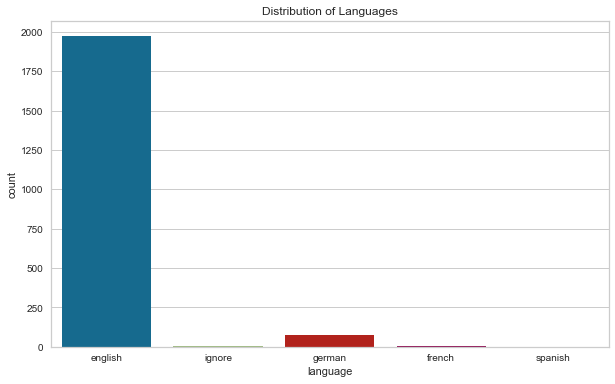

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=df_dropped)
plt.title('Distribution of Languages')
plt.show()

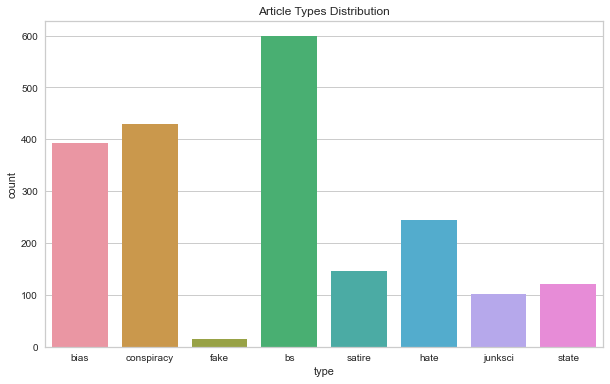

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df_dropped)
plt.title('Article Types Distribution')
plt.show()

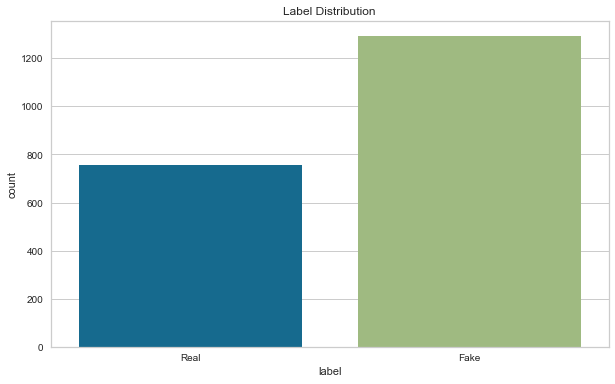

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_dropped)
plt.title('Label Distribution')
plt.show()

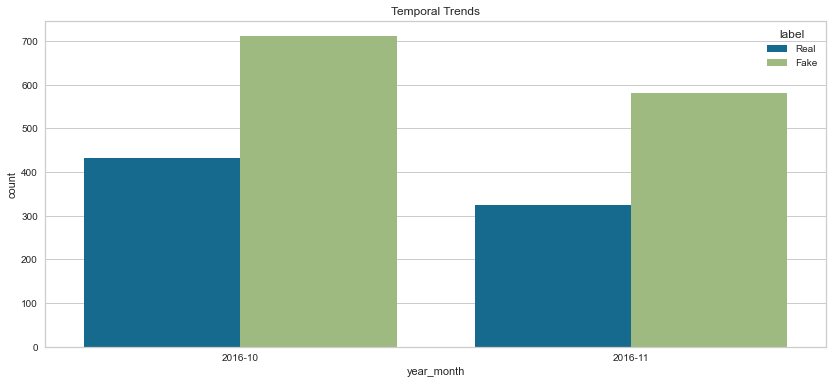

In [40]:
df_dropped['date'] = pd.to_datetime(df_dropped['date'])
df_dropped['year_month'] = df_dropped['date'].dt.to_period('M')
plt.figure(figsize=(14, 6))
sns.countplot(x='year_month', data=df_dropped, hue='label')
plt.title('Temporal Trends')
plt.show()

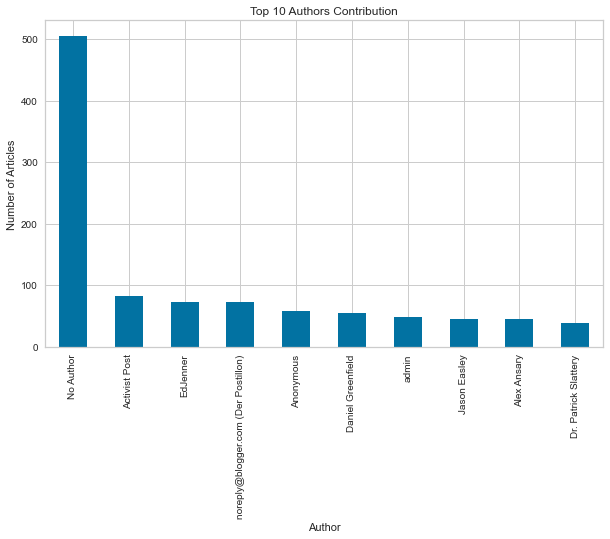

In [41]:
top_authors = df_dropped['author'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors Contribution')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

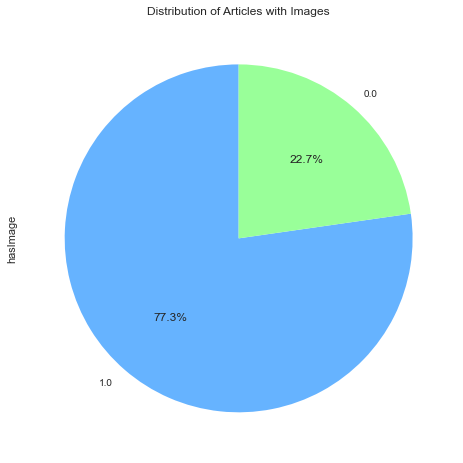

In [42]:
plt.figure(figsize=(8, 8))
df_dropped['hasImage'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Articles with Images')
plt.show()

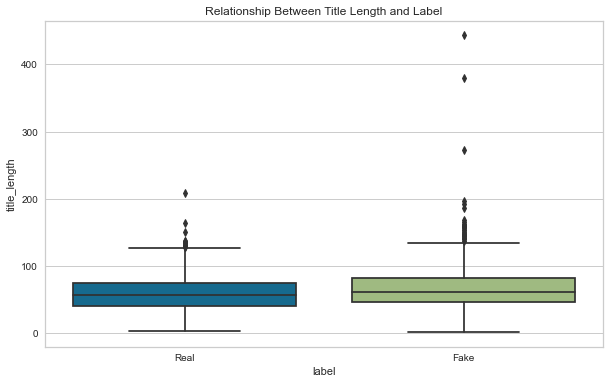

In [43]:
df_dropped['title_length'] = df_dropped['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='title_length', data=df_dropped)
plt.title('Relationship Between Title Length and Label')
plt.show()

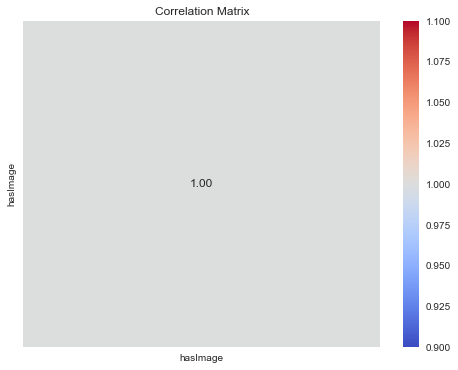

In [44]:
corr_matrix = df_dropped[['hasImage', 'label']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

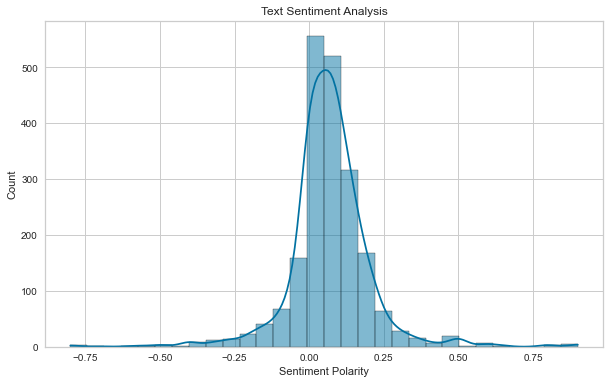

In [45]:
df_dropped['text_sentiment'] = df_dropped['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dropped, x='text_sentiment', bins=30, kde=True)
plt.title('Text Sentiment Analysis')
plt.xlabel('Sentiment Polarity')
plt.show()

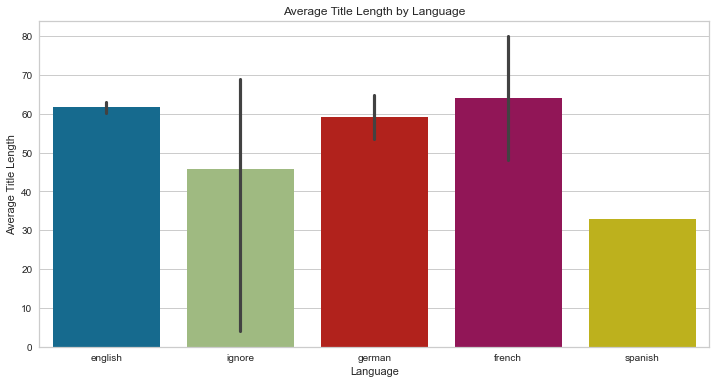

In [46]:
# Average Title Length by Language:

plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='title_length', data=df_dropped)
plt.title('Average Title Length by Language')
plt.xlabel('Language')
plt.ylabel('Average Title Length')
plt.show()

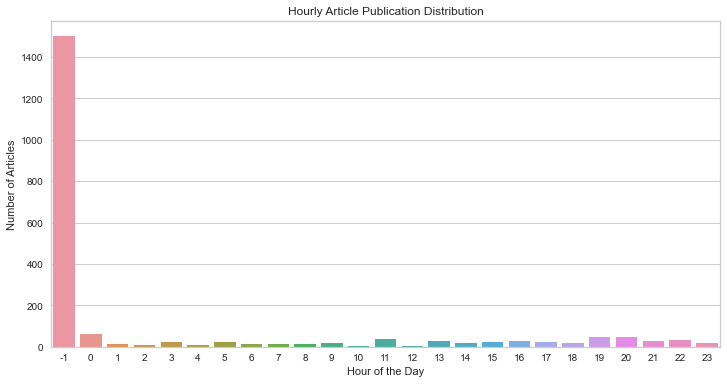

In [47]:
# Hourly Article Publication Distribution:

def extract_hour(time_str):
    try:
        return datetime.strptime(str(time_str), '%H:%M:%S').hour
    except ValueError:
        return -1  

df_dropped['hour'] = df_dropped['time'].apply(extract_hour)

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df_dropped)
plt.title('Hourly Article Publication Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()

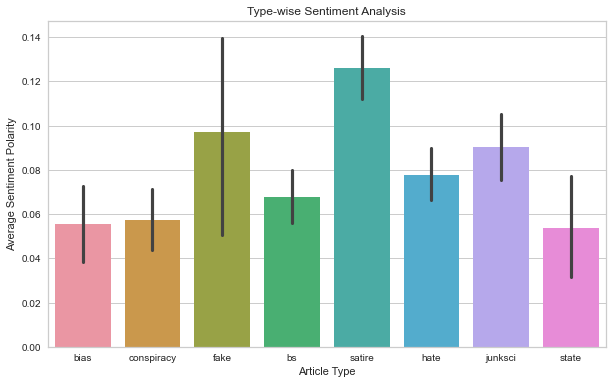

In [48]:
# Type-wise Sentiment Analysis:

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='text_sentiment', data=df_dropped)
plt.title('Type-wise Sentiment Analysis')
plt.xlabel('Article Type')
plt.ylabel('Average Sentiment Polarity')
plt.show()

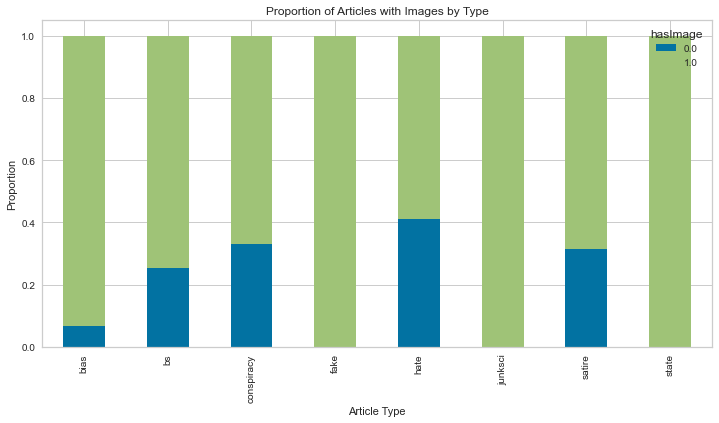

In [49]:
image_proportion = df_dropped.groupby('type')['hasImage'].value_counts(normalize=True).unstack()
image_proportion.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Articles with Images by Type')
plt.xlabel('Article Type')
plt.ylabel('Proportion')
plt.show()

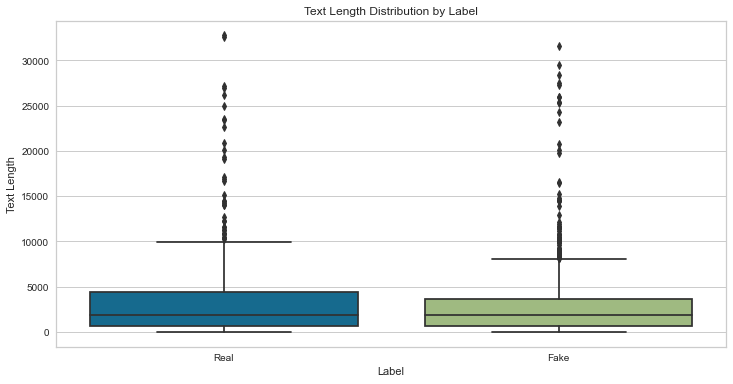

In [50]:
df_dropped['text_length'] = df_dropped['text'].apply(len)


plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_length', data=df_dropped)
plt.title('Text Length Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Text Length vs. Title Length')

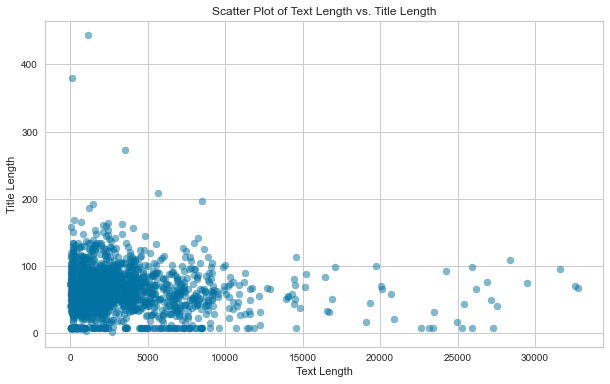

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df_dropped['text'].apply(len), df_dropped['title'].apply(len), alpha=0.5)
plt.xlabel('Text Length')
plt.ylabel('Title Length')
plt.title('Scatter Plot of Text Length vs. Title Length')

Text(0.5, 1.0, 'Article Count Over Time')

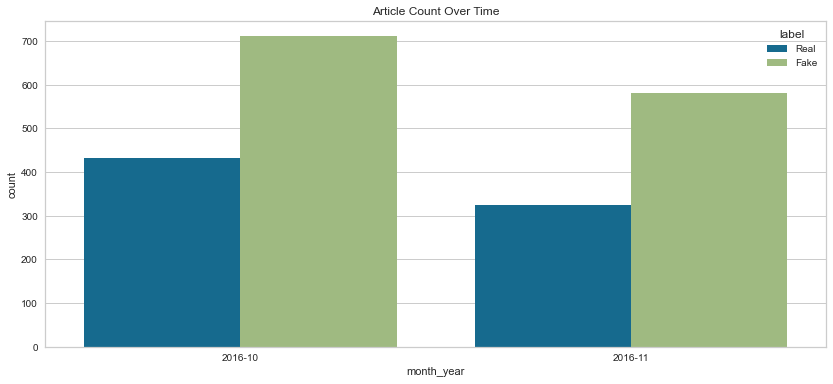

In [52]:
df_dropped['date'] = pd.to_datetime(df_dropped['date'])
df_dropped['month_year'] = df_dropped['date'].dt.to_period('M')
plt.figure(figsize=(14, 6))
sns.countplot(x='month_year', data=df_dropped, hue='label')
plt.title('Article Count Over Time')

In [53]:
type_sunburst = px.sunburst(df_dropped, path=['type'], title='Article Types Distribution')
type_sunburst.show()

In [54]:
df_dropped['month_year'] = df_dropped['date'].dt.strftime('%Y-%m')

# Interactive Plot: Animated line chart for article count over time
time_line_chart = px.line(df_dropped, x='month_year', y='type', animation_frame='month_year', title='Article Count Over Time',
                          labels={'month_year': 'Month Year', 'count': 'Article Count'})
time_line_chart.show()

In [36]:
fake_news['target'] = 'fake'
true_news['target'] = 'true'
data_combine = pd.concat([fake_news, true_news]).reset_index(drop = True)
data_combine.shape

(44898, 5)

In [37]:
data_combine.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

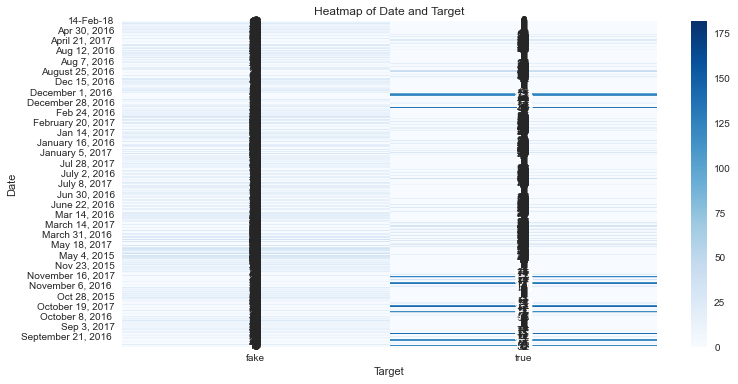

In [57]:
plt.figure(figsize=(12, 6))

heatmap_data = data_combine.pivot_table(index='date', columns='target', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')

plt.title('Heatmap of Date and Target')
plt.xlabel('Target')
plt.ylabel('Date')
plt.show()

In [38]:
from sklearn.utils import shuffle
data = shuffle(data_combine)
data = data.reset_index(drop=True)

In [39]:
data.head()

title  \
0  "You are the light" - Philippines' Duterte cro...   
1  Secret Service Laptop Reportedly ‘Stolen’ had ...   
2   Donald Trump’s Longtime Butler Calls For Obam...   
3  BOOM! REPUBLICAN Wins Montana Election After “...   
4  WHOA! West Virginia Coal Miners Just Made Powe...   

                                                text    subject  \
0  MANILA (Reuters) - President Rodrigo Duterte c...  worldnews   
1  21st Century Wire says A laptop was reportedly...    US_News   
2  If a man s character really is about the compa...       News   
3  This is just too rich! The Democrats threw ton...   politics   
4  The economic devastation is very real in West ...  left-news   

                 date target  
0  November 13, 2017    true  
1      March 17, 2017   fake  
2        May 12, 2016   fake  
3        May 26, 2017   fake  
4         May 9, 2016   fake

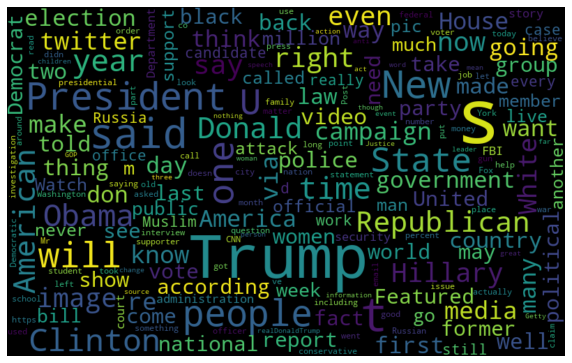

In [60]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

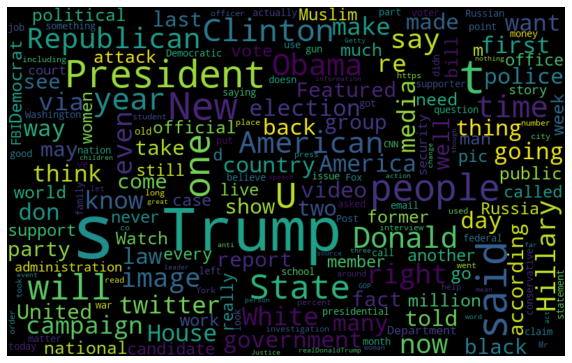

In [61]:
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
# pip install --upgrade pip 

In [63]:
# pip install --upgrade Pillow

In [64]:
# pip install nltk

In [42]:
import nltk

In [43]:
from nltk import tokenize

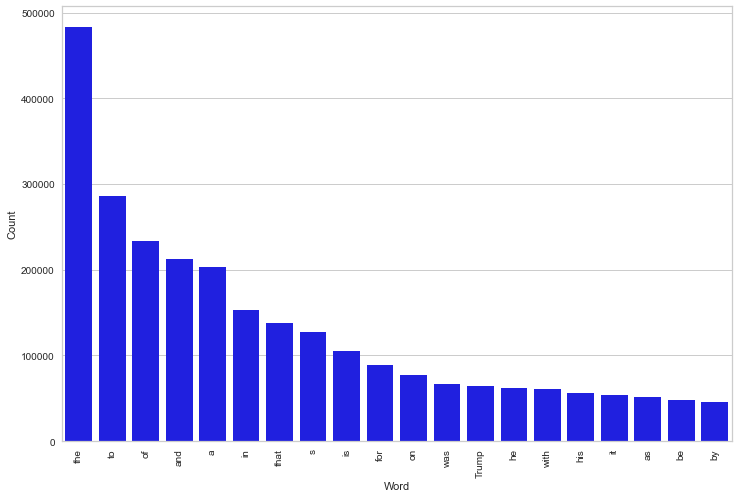

In [44]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

counter(data[data["target"] == "fake"], "text", 20)

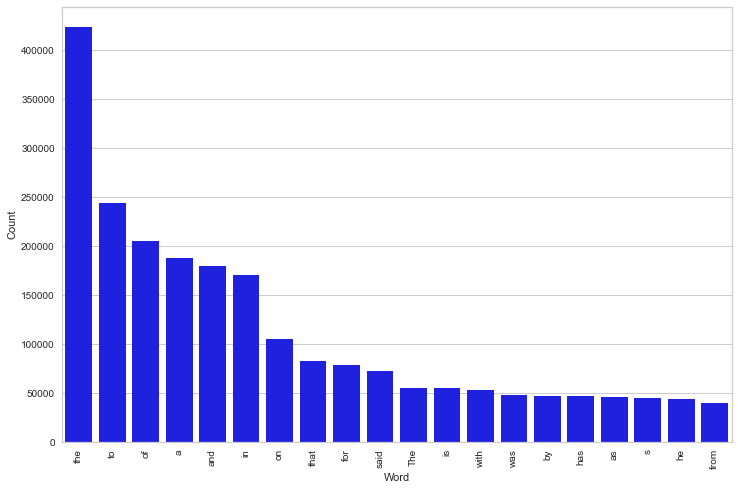

In [45]:
counter(data[data["target"] == "true"], "text", 20)

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


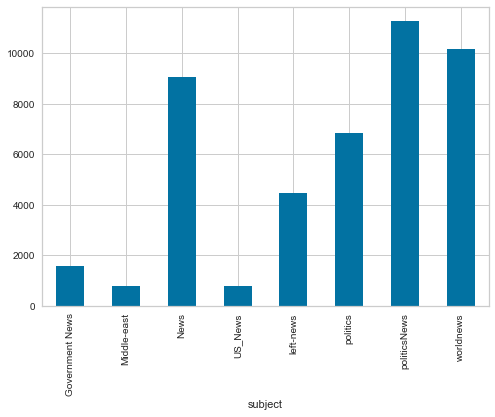

In [46]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [47]:
data.head()

title  \
0  "You are the light" - Philippines' Duterte cro...   
1  Secret Service Laptop Reportedly ‘Stolen’ had ...   
2   Donald Trump’s Longtime Butler Calls For Obam...   
3  BOOM! REPUBLICAN Wins Montana Election After “...   
4  WHOA! West Virginia Coal Miners Just Made Powe...   

                                                text    subject  \
0  MANILA (Reuters) - President Rodrigo Duterte c...  worldnews   
1  21st Century Wire says A laptop was reportedly...    US_News   
2  If a man s character really is about the compa...       News   
3  This is just too rich! The Democrats threw ton...   politics   
4  The economic devastation is very real in West ...  left-news   

                 date target  
0  November 13, 2017    true  
1      March 17, 2017   fake  
2        May 12, 2016   fake  
3        May 26, 2017   fake  
4         May 9, 2016   fake

In [48]:
data.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [49]:
data.to_csv('final_data.csv', index=False)

# K-Means Clustering

In [50]:
# Extracting the text data
text_data = data['text']

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(text_data)

# Performing k-means clustering
k = 5  # Number of clusters (Tried the same with k value as 3,4,5 - Resulting graph can be seen in the website)
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)

# Adding the cluster labels to DataFrame
data['cluster'] = clusters

print("Cluster centers:")
print(kmeans.cluster_centers_)

# Printing the top terms per cluster
print("\nTop terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print()

Cluster centers:
[[0.00469405 0.00424272 0.00213762 ... 0.01480168 0.00213543 0.00504397]
 [0.00912395 0.0062854  0.00393541 ... 0.01328847 0.00304663 0.00387684]
 [0.01585444 0.0074505  0.00444822 ... 0.01098116 0.00431837 0.00438027]
 [0.00469724 0.00268731 0.00300215 ... 0.00536221 0.00216066 0.0018993 ]
 [0.00443087 0.00496297 0.00326085 ... 0.07812367 0.00668484 0.02254375]]

Top terms per cluster:
Cluster 0:
 the
 to
 of
 on
 in
 and
 said
 reuters
 trump
 that

Cluster 1:
 the
 to
 trump
 of
 and
 in
 that
 clinton
 on
 he

Cluster 2:
 the
 to
 of
 and
 in
 that
 on
 said
 for
 is

Cluster 3:
 korea
 north
 the
 to
 korean
 nuclear
 and
 of
 china
 missile

Cluster 4:
 the
 to
 and
 of
 trump
 that
 he
 in
 is
 you



C:\Users\SriMedha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
X

<44898x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5398434 stored elements in Compressed Sparse Row format>

In [52]:
import numpy as np

dense_X = X.toarray()
print(dense_X)

[[0.         0.0587461  0.         ... 0.0743085  0.         0.        ]
 [0.         0.         0.         ... 0.04079724 0.         0.        ]
 [0.         0.         0.         ... 0.10213151 0.         0.11558465]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04418997 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [74]:
text_data

0        Pamela Gellar is a badass warrior who has a kn...
1        LAGOS (Reuters) - Nigeria s air force on Tuesd...
2        WASHINGTON/NEW YORK (Reuters) - The Obama admi...
3        21st Century Wire says For those who still ref...
4        LONDON (Reuters) - British foreign secretary B...
                               ...                        
44893    TOKYO (Reuters) - Japanese Deputy Prime Minist...
44894    ANKARA (Reuters) - The Kurdish Regional Govern...
44895    Baylor University s vice president for senior ...
44896    The Republican Party is truly screwed if Fox N...
44897    BRASILIA (Reuters) - The United Nations has as...
Name: text, Length: 44898, dtype: object

In [75]:
data.head()

title  \
0  ANTI-JIHAD WARRIOR Pamela Gellar STRIKES BACK ...   
1  Nigerian air force deploys aircraft to restive...   
2  U.S. to unveil retirement advice rule next wee...   
3  Boston Brakes? How to Hack a New Car With Your...   
4  UK criticizes Muslim Brotherhood, defends West...   

                                                text       subject  \
0  Pamela Gellar is a badass warrior who has a kn...     left-news   
1  LAGOS (Reuters) - Nigeria s air force on Tuesd...     worldnews   
2  WASHINGTON/NEW YORK (Reuters) - The Obama admi...  politicsNews   
3  21st Century Wire says For those who still ref...       US_News   
4  LONDON (Reuters) - British foreign secretary B...     worldnews   

                  date target  cluster  
0         Jun 30, 2016   fake        1  
1  September 19, 2017    true        1  
2       April 1, 2016    true        1  
3     January 22, 2016   fake        2  
4    December 7, 2017    true        1

C:\Users\SriMedha\AppData\Local\Temp\ipykernel_3216\978423705.py:9: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



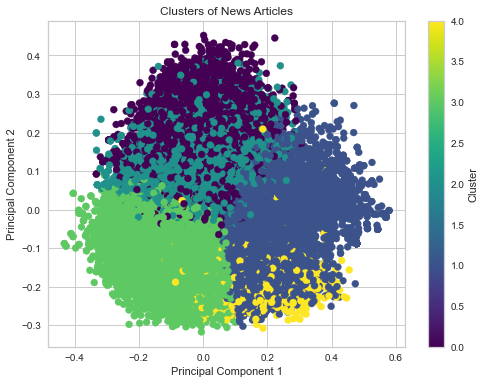

In [97]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [78]:
def elbow_method(X):
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

In [79]:
def silhouette_method(X):
    silhouette_scores = []
    K_range = range(2, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    plt.plot(K_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

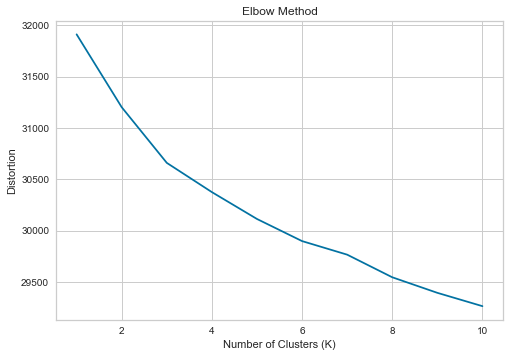

In [84]:
elbow_method(X)

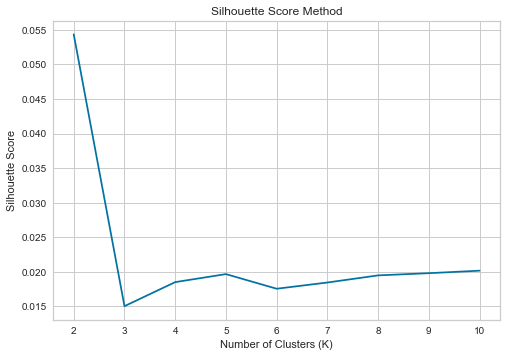

In [85]:
silhouette_method(X)

Clearly, for our case, the K-value should be 3 (from both elbow and silhouette method)